# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

# Author :- **Mrinmoy Sadhukhan**

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

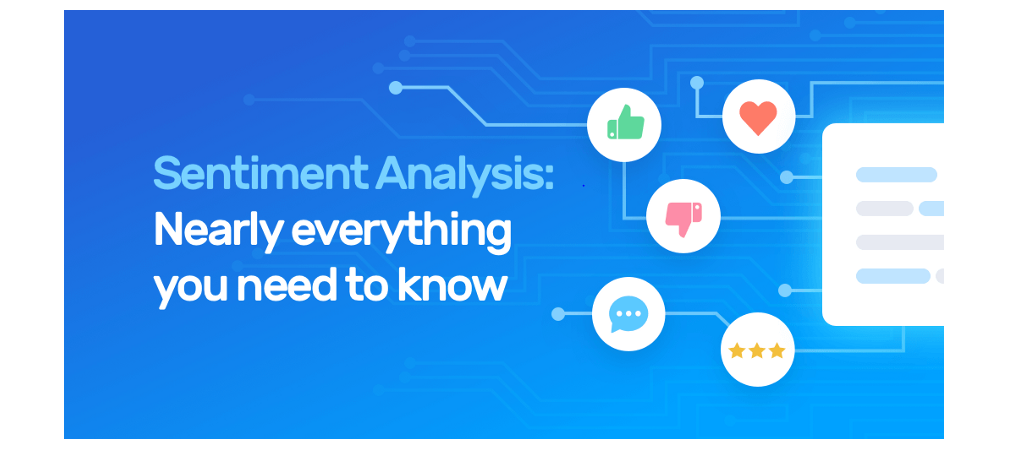

COVID-19 originally known as Corona VIrus Disease of 2019, has been declared as a pandemic by World Health Organization (WHO) on 11th March 2020. Unprecedented pressures have mounted on each country to make compelling requisites for controlling the population by assessing the cases and properly utilizing available resources. The rapid number of exponential cases globally has become the apprehension of panic, fear and anxiety among people. The mental and physical health of the global population is found to be directly proportional to this pandemic disease. It is the need of the hour to implement different measures to safeguard the countries by demystifying the pertinent facts and information.

# Workflow

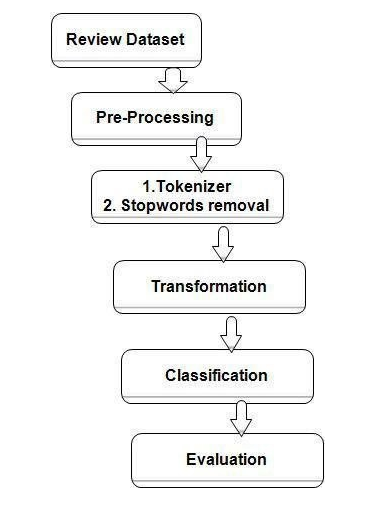



```
# This is formatted as code
```

# ????!map the n gram then check kor best gram with polarity and finally choose them based on mean value and make an vocuabulary with help of them and fit them in tf-idf to extract features and then training

#**1.Lets Invite Some Libraries.**

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
#from gensim.models.deprecated.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_colwidth', 400)

In [ ]:
#working_dir_path = '/content/drive/MyDrive/kaggle/nltkcovid19senti/Copy of Coronavirus Tweets - Copy.csv'
working_dir_path='/content/drive/MyDrive/kaggle/nltkcovid19senti/final7.5Ltweet-1.csv'
df = pd.read_csv(working_dir_path,encoding = 'latin',usecols=['tweet_ID','sentiment_category','date_stamp','text'],dtype={'tweet_ID':str})

# **2. Reviewing Our Dataset**

In [ ]:
df

,tweet_ID,sentiment_category,date_stamp,text
0,1307917234782826497,positive,2020-09-21 00:00:00,#DigitalMarketing in times of #Covid19 https://t.co/AJpJ5N65ko
1,1307917227522363392,positive,2020-09-21 00:00:00,"4242 #Covid positives in #Odisha today, tally reaches 1,84,122 https://t.co/RVKNd0k2eF"
2,1307917151471169536,positive,2020-09-21 00:00:00,"With spike of 86,961 cases, India's COVID-19 tally reaches at 54,87,581\nread more @ https://t.co/WeZOmTheiA https://t.co/t0WQoUCpId"
3,1307917100397326336,positive,2020-09-21 00:00:00,"We set out to solve the global challenge of scaling up testing for #COVID19 and are pleased to announce preliminary results!\n\nCough Against COVID, a non-invasive screening technology, can analyse cough sounds to detect the risk of COVID-19 infection: https://t.co/5SKiEieXsH https://t.co/BoWvy5SiLc"
4,1307917001818402817,negative,2020-09-21 00:00:00,Municipal commissioners to monitor COVIDcare in Odisha's private hospitals.\n\nThe State Government has directed municipal commissioners to monitor the COVID treatment at private hospitals in five cities and provide the details about bed strength and occupency in Monday. https://t.co/5A9mhBKV1w
...,...,...,...,...
826843,1345034078823727105,positive,2021-01-01 00:00:00,"Itâs new year! People go out with friends and family and consume from local food outlets. Also there is no lockdown/shutdown, they why @cpbbsrctc mobile vans harass people in the name of covid? Shut the shops/food stalls out there or stop harassing people @dcp_cuttack @CMCCuttack"
826844,1345034075069796352,positive,2021-01-01 00:00:00,"@hvgoenka So Well Said Essential workersâthe nurses, doctors, delivery people, grocery-store employees and many others who continue to risk their lives on the front lines of\ntheÂ COVID-19 pandemicâhave won 2020 Person of the Year.\n#Salute...ð"
826845,1345034027053375489,very positive,2021-01-01 00:00:00,May this year we become \nCovid 19 Free\nFree from stress \nAnd gain more Success.\n#HappyNewYear \n#ARMediaMarketing https://t.co/1JacrAjWVJ
826846,1345033939094622208,negative,2021-01-01 00:00:00,"@MeghUpdates During covid nation and punjab suffered economically, and now instead of supporting the industry Punjab gov. and these dalals have damage the business and industry, really shame on them."


In [ ]:
# There 826848 rows and 4 columns in our database
df.shape

(826848, 4)

In [ ]:
# Names Of columns in our dataset
df.columns

Index(['tweet_ID', 'sentiment_category', 'date_stamp', 'text'], dtype='object')

In [ ]:
df.sentiment_category.value_counts()

negative         386835
positive         272315
neutral          148099
very negative     13219
very positive      6368
Name: sentiment_category, dtype: int64

# Data Preprocessing

**A) Removing @user**

In [ ]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))
    for i in r:
        input_txt = re.sub(i,'',str(input_txt))
    return input_txt

In [ ]:
# create new column with removed # tag
df['text'] = np.vectorize(remove_pattern)(df['text'], '#[\w]*')

In [ ]:
# create new column with removed @user
df['text'] = np.vectorize(remove_pattern)(df['text'], '@[\w]*')

In [ ]:
df.head(2)

,tweet_ID,sentiment_category,date_stamp,text
0,1307917234782826497,positive,2020-09-21 00:00:00,in times of https://t.co/AJpJ5N65ko
1,1307917227522363392,positive,2020-09-21 00:00:00,"4242 positives in today, tally reaches 1,84,122 https://t.co/RVKNd0k2eF"


**REMOVED HTTP AND URLS FROM TWEET**

In [ ]:
import re
df['text'] = df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
df.head(3)

,tweet_ID,sentiment_category,date_stamp,text
0,1307917234782826497,positive,2020-09-21 00:00:00,in times of
1,1307917227522363392,positive,2020-09-21 00:00:00,"4242 positives in today, tally reaches 1,84,122"
2,1307917151471169536,positive,2020-09-21 00:00:00,"With spike of 86,961 cases, India's COVID-19 tally reaches at 54,87,581\nread more"


**B) Removing Punctuations, Numbers, and Special Characters**

In [ ]:
# remove special characters, numbers, punctuations
df['text'] = df['text'].str.replace('[^a-zA-Z#]+',' ')

In [ ]:
df.head(5)

,tweet_ID,sentiment_category,date_stamp,text
0,1307917234782826497,positive,2020-09-21 00:00:00,in times of
1,1307917227522363392,positive,2020-09-21 00:00:00,positives in today tally reaches
2,1307917151471169536,positive,2020-09-21 00:00:00,With spike of cases India s COVID tally reaches at read more
3,1307917100397326336,positive,2020-09-21 00:00:00,We set out to solve the global challenge of scaling up testing for and are pleased to announce preliminary results Cough Against COVID a non invasive screening technology can analyse cough sounds to detect the risk of COVID infection
4,1307917001818402817,negative,2020-09-21 00:00:00,Municipal commissioners to monitor COVIDcare in Odisha s private hospitals The State Government has directed municipal commissioners to monitor the COVID treatment at private hospitals in five cities and provide the details about bed strength and occupency in Monday


**C) Removing Short Words**

In [ ]:
# remove short words
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [ ]:
df.head(2)

,tweet_ID,sentiment_category,date_stamp,text
0,1307917234782826497,positive,2020-09-21 00:00:00,times
1,1307917227522363392,positive,2020-09-21 00:00:00,positives today tally reaches


In [ ]:
def clean_tweet_text(text):
    text=str(text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    return text

# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
#df['text'].transform(clean_tweet_text)
df['text']=df['text'].apply(lambda x:clean_tweet_text(x))
df.head(3)

,tweet_ID,sentiment_category,date_stamp,text
0,1307917234782826497,positive,2020-09-21 00:00:00,times
1,1307917227522363392,positive,2020-09-21 00:00:00,positives today tally reaches
2,1307917151471169536,positive,2020-09-21 00:00:00,with spike cases india covid tally reaches read more


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)

# tokenize the tweets
#tweet_tokens = tokenizer.tokenize()
df['text']=df['text'].apply(lambda x:tokenizer.tokenize(x))
#print('\nTokenized string:')
#print(tweet_tokens)

In [ ]:
print(df['text'])

0                                                                                                                                                                                                                                                                                         [times]
1                                                                                                                                                                                                                                                              [positives, today, tally, reaches]
2                                                                                                                                                                                                                                  [with, spike, cases, india, covid, tally, reaches, read, more]
3                                              [set, out, solve, the, global, challenge, scaling, testing, for, and, are, pleased,

In [ ]:
stopwords_english = stopwords.words('english')
def cleanstopword(tweet_tokens):
  tweets_clean = []
  for word in tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation):
      tweets_clean.append(''.join(word))
  return tweets_clean
##########################################3  
df['text']=df['text'].apply(lambda x:cleanstopword(x))

In [ ]:
from nltk.stem.porter import PorterStemmer
# Instantiate stemming class
stemmer = PorterStemmer() 
def cleanstem(tweets_clean):
  # Create an empty list to store the stems
  tweets_stem = []
  for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list
  return tweets_stem

#print('Words after stemming: ')
#print(tweets_stem)
df['text']=df['text'].apply(lambda x:cleanstem(x))

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#def get_lemmatized_text(corpus):
 
#    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

#lemmatized_reviews = get_lemmatized_text(reviews_train_clean)

def cleanlem(tweets_clean):
  tweets_lemt = []
  for word in tweets_clean:
    lemt_word=lemmatizer.lemmatize(word)  # stemming word
    tweets_lemt.append(lemt_word)  # append to the list
  return tweets_lemt
df['text']=df['text'].apply(lambda x:cleanlem(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
df['text']=df['text'].apply(lambda x:TreebankWordDetokenizer().detokenize(x))

In [ ]:
#df[df['sentiment_category']=='negative']
tweets_text_postive_temp=df[df['sentiment_category']=='positive']
#tweets_text_postive=[]
tweets_text_postive=tweets_text_postive_temp[['text','sentiment_category']].copy()
tweets_text_postive

,text,sentiment_category
0,time,positive
1,posit today talli reach,positive
2,spike case india covid talli reach read,positive
3,set solv global challeng scale test plea announc preliminari result cough covid non invas screen technolog analys cough sound detect risk covid infect,positive
6,nobl leadership hon india extend help hand maldiv provid million overcom econom impact covid feel proud read tweet hon presid maldiv,positive
...,...,...
826835,train covid break one best move sindhu,positive
826836,kudo team daili protest relentless pursuit final patient get premium non covid servic resid doctor resum train though pain see silenc usual vocal govt critic,positive
826842,shri shripad yesso naik union ayush minist would inaugur event would follow intern virtual confer theme siddha covid,positive
826843,new year peopl friend famili consum local food outlet also lockdown shutdown mobil van harass peopl name covid shut shop food stall stop harass peopl,positive


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
def ngram_df(corpus,nrange):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df
#unigram_df_1=ngram_df(tweets_text_postive['text'],(1,1))
#bigram_df_1=ngram_df(tweets_text_postive['text'],(2,2))
trigram_df_1=ngram_df(tweets_text_postive['text'],(3,3))

#unigram_df=unigram_df_1[:20]
#bigram_df=bigram_df_1[:20]
trigram_df=trigram_df_1[:20]

fig = make_subplots(
    rows=1, cols=1,subplot_titles=('Trigram'),
    specs=[[{"type": "scatter"}]
          ])

#fig.add_trace(go.Bar(
#    y=unigram_df['text'][::-1],
#    x=unigram_df['count'][::-1],
#    marker={'color': "blue"},  
#    text=unigram_df['count'],
#    textposition = "outside",
#    orientation="h",
#    name="Months",
#),row=1,col=1)

#fig.add_trace(go.Bar(
#    y=bigram_df['text'][::-1],
#    x=bigram_df['count'][::-1],
#    marker={'color': "blue"},  
#    text=bigram_df['count'],
#     name="Days",
#    textposition = "outside",
#    orientation="h",
#),row=2,col=1)

fig.add_trace(go.Bar(
    y=trigram_df['text'][::-1],
    x=trigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=trigram_df['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=1,col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ",
                  showlegend=False,title_x=0.5,height=1200,template="plotly_dark")
fig.show()

In [ ]:
#!pip install textblob
#!pip install wordcloud
#!python -m textblob.download_corpora
#!pip install plotly
#!pip install wordninja
#!pip install pyspellchecker

feature extraction using tf-idf for positive tweet

In [ ]:
# Build tf-idf vectorizer and cosine similarity matrix
#def build_vectorizer(sentences, vocab=None, min_df=0.0, max_df=1.0, ngram_range=(1,3)):   # for a 2-gram use: ngram_range=(1,2)
 #   '''
 #   Build the tf-idf vectorizer: 
 #   1. Build the count_vectorizer from the input sentences.
 #   2. Transform count_vectorizer to bag-of-words.
 #   3. Fit the transform to the bag-of-words.
 #   
 #   Note:
 #   Alternatively we can do this directly with 'TfidfVectorizer' instead of using 'CountVectorizer' followed by 'TfidfTransformer'
    
 #   Return:
 #   cvec, feature_names, df_bag_of_words, tfidf, df_weights, cos_sim, samp_dist
 #   '''
 ##max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example: max_df = 0.50 means "ignore terms that appear in more than 50% of the documents". max_df = 25 means "ignore terms that appear in more than 25 documents"
 ##min_df is used for removing terms that appear too infrequently. For example: min_df = 0.01 means "ignore terms that appear in less than 1% of the documents". min_df = 5 means "ignore terms that appear in less than 5 documents"
 # Build count vectorizer
max_df=1.0                 ###???
min_df=0.0                 ####????
vocab=None
sentences=tweets_text_postive['text']
count_vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, vocabulary=vocab, ngram_range=(1,2))  # stop_words='english, max_features=N_FEATURES 
cvec = count_vectorizer.fit(sentences)

    # Get feature names
feature_names = cvec.get_feature_names()
print("%d feature_names (each feature represents a distinct word):" % len(feature_names))
print(feature_names)
    # Get bag-of-words and analyze
#bag_of_words = cvec.transform(sentences)
#df_bag_of_words = pd.DataFrame(bag_of_words.todense(), columns=feature_names)
    
    # Transform bag_of_words into tf-idf matrix
#transformer = TfidfTransformer()
#tfidf = transformer.fit_transform(bag_of_words)

    # Find most popular words and highest weights
#word_cnts = np.asarray(bag_of_words.sum(axis=0)).ravel().tolist()  # for each word in column, sum all row counts
#df_cnts = pd.DataFrame({'word': feature_names, 'count': word_cnts})
#df_cnts = df_cnts.sort_values('count', ascending=False)

    # Build word weights as a list and sort them
#weights = np.asarray(tfidf.mean(axis=0)).ravel().tolist()
#df_weights = pd.DataFrame({'word': feature_names, 'weight': weights})
#df_weights = df_weights.sort_values('weight', ascending=False)

#df_weights = df_weights.merge(df_cnts, on='word', how='left')
#df_weights = df_weights[['word', 'count', 'weight']]

    # Cosine similarity of sentences
#cos_sim = cosine_similarity(tfidf, tfidf)

    # Distance matrix of sentences
#samp_dist = 1 - cos_sim

#    return cvec, df_bag_of_words, tfidf, df_weights, cos_sim, samp_dist
  
# Build
#sentences = df_sentences['Sentence'].values.tolist()

#cvec, df_bag_of_words, tfidf, df_weights, cos_sim, samp_dist = build_vectorizer(sentences)

#df_tfidf = pd.DataFrame(tfidf.todense(), columns=feature_names)

#print("%d dummy sentences:" % len(sentences))
#print(sentences)
#print("---")
#print("%d feature_names (each feature represents a distinct word):" % len(feature_names))
#print(feature_names)
#print("---")
#print("df_tfidf[%d,%d]:" % (len(sentences), len(feature_names)))
#print(df_tfidf.to_string())
#print("---")
#print("df_weights:")
#print(df_weights)
#print("---")
#print("cos_sim[%d,%d] (a square matrix of length and width = len(sentences)):" % (len(sentences), len(sentences)))
#print(cos_sim)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create object
tfidf = TfidfVectorizer(use_idf=True)
  
# get tf-df values
result = tfidf.fit_transform(sentences)
  
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
    print(ele1, ':', ele2)
  
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)
  
# display tf-idf values
print('\ntf-idf value:')
print(result)
# get the first vector out (for the first document) 
#first_vector_tfidfvectorizer=result[0] 

# place tf-idf values in a pandas data frame 
#df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf.get_feature_names(), columns=["tfidf"]) 
#df.sort_values(by=["tfidf"],ascending=False)
 
# in matrix form
#print('\ntf-idf values in matrix form:')
#print(result.toarray())

Streaming output truncated to the last 5000 lines.
upa : 10.806668234555413
upaday : 12.821571255097677
upadhay : 12.821571255097677
upadhaya : 12.821571255097677
upadhyay : 10.25662189763614
upadhyaya : 12.416106146989513
upadyay : 12.821571255097677
upagchem : 12.821571255097677
upamanyu : 11.722958966429568
upanishad : 11.317493858321404
upar : 11.029811785869622
uparh : 12.821571255097677
upasana : 12.416106146989513
upasna : 11.317493858321404
upay : 12.821571255097677
upbeat : 10.681505091601407
upbring : 12.416106146989513
upchar : 12.821571255097677
upciti : 12.821571255097677
upcm : 12.821571255097677
upcom : 7.245622151951361
upcycl : 11.317493858321404
upd : 12.821571255097677
updat : 4.390044890438531
update : 12.821571255097677
updatenew : 12.821571255097677
updateon : 12.821571255097677
updatesindia : 10.570279456491182
updatesinindia : 10.74212971341784
updtat : 12.821571255097677
upe : 12.128424074537731
upec : 12.416106146989513
upen : 12.821571255097677
upend : 10.113

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
bag_of_words = cvec.transform(sentences)
transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf = transformer.fit_transform(bag_of_words)

In [ ]:
print(tfidf) ###tfidf value as per each tweet only not whole document

  (0, 950305)	1.0
  (1, 956198)	0.5615777171787462
  (1, 954628)	0.2418765131245203
  (1, 926288)	0.4035125036752042
  (1, 926110)	0.2896048065202287
  (1, 763346)	0.3069549836105011
  (1, 717158)	0.49547535483766897
  (1, 715443)	0.19928809841619738
  (2, 926288)	0.335075523248746
  (2, 926110)	0.24048692716155987
  (2, 882254)	0.36995738314560067
  (2, 882231)	0.29798897803210467
  (2, 764245)	0.22567127965216024
  (2, 763832)	0.45788743346220107
  (2, 763346)	0.25489446004847366
  (2, 458631)	0.26261715118702644
  (2, 458031)	0.14890282374630975
  (2, 216709)	0.2842871352708137
  (2, 210326)	0.07025068274564132
  (2, 139578)	0.28017854905260026
  (2, 138792)	0.15254753092860382
  (3, 937225)	0.16640471372873297
  (3, 936124)	0.05447670784498094
  (3, 931744)	0.20184611987215348
  (3, 931703)	0.09147779709770797
  :	:
  (272314, 663757)	0.10744271669799252
  (272314, 645479)	0.1945085181552212
  (272314, 645419)	0.1185887710031819
  (272314, 567716)	0.17328453782301387
  (272314, 567

In [ ]:
# print idf values 
df_idf = pd.DataFrame(transformer.idf_, index=cvec.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights']) ###idf values 

,idf_weights
covid,1.437821
corona,2.932538
vaccin,2.989070
india,3.047595
case,3.122191
...,...
help dancer,12.821571
help data,12.821571
help date,12.821571
help constant,12.821571


In [ ]:
print(tfidf.shape)


(272315, 1060063)


In [ ]:
word_cnts = np.asarray(bag_of_words.sum(axis=0)).ravel().tolist()  # for each word in column, sum all row counts
df_cnts = pd.DataFrame({'word': feature_names, 'count': word_cnts})
df_cnts = df_cnts.sort_values('count', ascending=False)

    # Build word weights as a list and sort them
weights = np.asarray(tfidf.sum(axis=0)).ravel().tolist()
df_weights = pd.DataFrame({'word': feature_names, 'weight': weights })
df_weights = df_weights.sort_values('weight', ascending=False)

df_weights = df_weights.merge(df_cnts, on='word', how='left')
##df_weights_1=df_weights.merge(df_idf)
df_weights = df_weights[['word', 'count', 'weight']]


In [ ]:
weights

[2.5157450146894393,
 0.23118134968087672,
 1.2262409051486067,
 0.3207418878059985,
 0.2533985075856804,
 0.22238713107720673,
 0.3939812659195041,
 0.1807471297406459,
 1.6045972864791658,
 0.16345698199113062,
 0.17056435673730586,
 0.33782165934042163,
 0.25927544938886593,
 0.19986542892097017,
 0.2620701715156095,
 0.1689629220069386,
 0.2558288095512444,
 0.20318935276597783,
 0.20318935276597783,
 0.91954046060858,
 0.2882029734666393,
 0.16345698199113062,
 0.5204328296543481,
 0.4050876307722881,
 0.24260183454849313,
 0.24260183454849313,
 0.17475714888913618,
 0.17475714888913618,
 0.22360095526044937,
 0.22360095526044937,
 0.21783935060280388,
 0.538196463578341,
 0.3502195793769857,
 0.20555243362923561,
 0.22738749431693323,
 0.22738749431693323,
 0.181391881355053,
 0.181391881355053,
 1.7510286928729535,
 0.1613141395975293,
 0.2561625626218943,
 0.30953721232903814,
 0.209528256437513,
 0.16417335054551155,
 0.3219289259586023,
 0.2913465459749909,
 0.269746699388505

In [ ]:
df_weights## weight means tf_idf weight

,word,count,weight
0,covid,185852,7342.710224
1,case,44563,4410.742661
2,vaccin,44218,3696.771124
3,corona,42266,3594.714111
4,india,39539,3385.046539
...,...,...,...
1060058,nirav bhai,1,0.077548
1060059,come job,1,0.077548
1060060,come mehul,1,0.077548
1060061,come achch,1,0.077548


In [ ]:
df_weights.to_csv('hk.csv')

In [ ]:
#from sklearn.metrics.pairwise import cosine_similarity
    # Cosine similarity of sentences
#cos_sim = cosine_similarity(tfidf, tfidf)

    # Distance matrix of sentences
#samp_dist = 1 - cos_sim

In [ ]:
#df_tfidf = pd.DataFrame(tfidf.todense(), columns=feature_names)

In [ ]:
#print("df_tfidf[%d,%d]:" % (len(sentences), len(feature_names)))
#print(df_tfidf.to_string())
#print("---")
print("df_weights:")
print(df_weights)
#print("---")
#print("cos_sim[%d,%d] (a square matrix of length and width = len(sentences)):" % (len(sentences), len(sentences)))
#print(cos_sim)

df_weights:
                   word  count    weight
0        deplet patient      1  1.000000
1         return villag      1  1.000000
2          yogiji fight      1  1.000000
3            smuggl say      1  1.000000
4           benara play      1  1.000000
...                 ...    ...       ...
1060058       aap khush      1  0.054454
1060059      abroad via      1  0.051653
1060060         aanounc      1  0.048741
1060061            aalu      1  0.046679
1060062  aaa supervisor      1  0.025157

[1060063 rows x 3 columns]


In [ ]:
import statistics
x = statistics.mean(df_weights['weight'])

In [ ]:
print(x)

1.124691743460958


In [ ]:
docs=tweets_text_postive['text'].tolist()
cv=CountVectorizer(stop_words='english',ngram_range=(3,3))
word_count_vector=cv.fit_transform(docs)

In [ ]:
list(cv.vocabulary_.keys())[:10]

['posit today talli',
 'today talli reach',
 'spike case india',
 'case india covid',
 'india covid talli',
 'covid talli reach',
 'talli reach read',
 'set solv global',
 'solv global challeng',
 'global challeng scale']

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) ##?? is ngram_range by default set to 1,1
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [ ]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=32):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results


feature_names=cv.get_feature_names()


#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform(docs))

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 32
keywords=extract_topn_from_vector(feature_names,sorted_items,100)


print("\n===Keywords===")
for k in keywords:
    print(k,keywords[k])

KeyboardInterrupt: ignored

In [ ]:
#df[df['sentiment_category']=='negative']
tweets_text_negative_temp=df[df['sentiment_category']=='negative']
#tweets_text_postive=[]
tweets_text_negative=tweets_text_negative_temp[['text','sentiment_category']].copy()
tweets_text_negative

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
def ngram_df(corpus,nrange):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df
unigram_df_2=ngram_df(tweets_text_negative['text'],(1,1))
bigram_df_2=ngram_df(tweets_text_negative['text'],(2,2))
trigram_df_2=ngram_df(tweets_text_negative['text'],(3,3))
unigram_df=unigram_df_2[:20]
bigram_df=bigram_df_2[:20]
trigram_df=trigram_df_2[:20]
fig = make_subplots(
    rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]
          ])

fig.add_trace(go.Bar(
    y=unigram_df['text'][::-1],
    x=unigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=unigram_df['count'],
    textposition = "outside",
    orientation="h",
    name="Months",
),row=1,col=1)

fig.add_trace(go.Bar(
    y=bigram_df['text'][::-1],
    x=bigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=bigram_df['count'],
     name="Days",
    textposition = "outside",
    orientation="h",
),row=2,col=1)

fig.add_trace(go.Bar(
    y=trigram_df['text'][::-1],
    x=trigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=trigram_df['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=3,col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ",
                  showlegend=False,title_x=0.5,height=1200,template="plotly_dark")
fig.show()

In [ ]:
unigram_df_2.to_csv('unigram_df_2.csv')

In [ ]:
unigram_df_2

In [ ]:
unigram_df_2['polarity'] = unigram_df_2['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
unigram_df_2['subjectivity'] = unigram_df_2['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
unigram_df_2

In [ ]:
fig = plt.figure(figsize=(10, 6))
unigram_df_2['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#fig.savefig("polarity_hist.png")
fig.show()

In [ ]:
print( " mean %f median %f mode %f",mean(unigram_df_2['polarity']),median(unigram_df_2['polarity']),mode(unigram_df_2['polarity']))

In [ ]:
bigram_df_2.to_csv('bigram_df_2.csv')

In [ ]:
bigram_df_2

In [ ]:
bigram_df_2['polarity'] = bigram_df_2['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
bigram_df_2['subjectivity'] = bigram_df_2['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
bigram_df_2.head()

In [ ]:
fig = plt.figure(figsize=(10, 6))
bigram_df_2['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#fig.savefig("polarity_hist.png")
fig.show()

In [ ]:
print( " mean %f median %f mode %f",mean(bigram_df_2['polarity']),median(bigram_df_2['polarity']),mode(bigram_df_2['polarity']))

In [ ]:
trigram_df_2.to_csv('trigram_df_2.csv')

In [ ]:
trigram_df_2

In [ ]:
trigram_df_2['polarity'] = trigram_df_2['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
trigram_df_2['subjectivity'] = trigram_df_2['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
trigram_df_2

In [ ]:
fig = plt.figure(figsize=(10, 6))
trigram_df_2['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#fig.savefig("polarity_hist.png")
fig.show()

In [ ]:
print( " mean %f median %f mode %f",mean(trigram_df_2['polarity']),median(trigram_df_2['polarity']),mode(trigram_df_2['polarity']))

feature extraction using tf-idf for negative tweet

In [ ]:
docs=tweets_text_negative['text'].tolist()
cv=CountVectorizer(max_df=0.85,stop_words='english',max_features=20000)
word_count_vector=cv.fit_transform(docs)

In [ ]:
list(cv.vocabulary_.keys())[:10]

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

In [ ]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=32):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results


feature_names=cv.get_feature_names()


#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform(docs))

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 32
keywords=extract_topn_from_vector(feature_names,sorted_items,32)


print("\n===Keywords===")
for k in keywords:
    print(k,keywords[k])

In [ ]:
#df[df['sentiment_category']=='negative']
#tweets_text_negative_temp=df[df['sentiment_category']=='negative']
#tweets_text_postive=[]
#tweets_text_negative=tweets_text_negative_temp[['text','sentiment_category']].copy()
#tweets_text_negative

tweets_text_neutral_temp=df[df['sentiment_category']=='neutral']
#tweets_text_postive=[]
tweets_text_neutral=tweets_text_neutral_temp[['text','sentiment_category']].copy()
tweets_text_neutral

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
def ngram_df(corpus,nrange):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    #print(words_freq)
    total_list=words_freq
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df
unigram_df_3=ngram_df(tweets_text_neutral['text'],(1,1))
bigram_df_3=ngram_df(tweets_text_neutral['text'],(2,2))
trigram_df_3=ngram_df(tweets_text_neutral['text'],(3,3))
unigram_df=unigram_df_3[:20]
bigram_df=bigram_df_3[:20]
trigram_df=trigram_df_3[:20]
fig = make_subplots(
    rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]
          ])

fig.add_trace(go.Bar(
    y=unigram_df['text'][::-1],
    x=unigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=unigram_df['count'],
    textposition = "outside",
    orientation="h",
    name="Months",
),row=1,col=1)

fig.add_trace(go.Bar(
    y=bigram_df['text'][::-1],
    x=bigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=bigram_df['count'],
     name="Days",
    textposition = "outside",
    orientation="h",
),row=2,col=1)

fig.add_trace(go.Bar(
    y=trigram_df['text'][::-1],
    x=trigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=trigram_df['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=3,col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ",
                  showlegend=False,title_x=0.5,height=1200,template="plotly_dark")
fig.show()

In [ ]:
unigram_df_3.to_csv('unigram_df_3.csv')

In [ ]:
unigram_df_3

In [ ]:
unigram_df_3['polarity'] = unigram_df_3['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
unigram_df_3['subjectivity'] = unigram_df_3['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
unigram_df_3

In [ ]:
fig = plt.figure(figsize=(10, 6))
unigram_df_3['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#fig.savefig("polarity_hist.png")
fig.show()

In [ ]:
print( " mean %f median %f mode %f",mean(unigram_df_3['polarity']),median(unigram_df_3['polarity']),mode(unigram_df_3['polarity']))

In [ ]:
bigram_df_3.to_csv('bigram_df_3.csv')

In [ ]:
bigram_df_3

In [ ]:
bigram_df_3['polarity'] = bigram_df_3['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
bigram_df_3['subjectivity'] = bigram_df_3['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
bigram_df_3.head()

In [ ]:
fig = plt.figure(figsize=(10, 6))
bigram_df_3['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#fig.savefig("polarity_hist.png")
fig.show()

In [ ]:
print( " mean %f median %f mode %f",mean(bigram_df_3['polarity']),median(bigram_df_3['polarity']),mode(bigram_df_3['polarity']))

In [ ]:
trigram_df_3.to_csv('trigram_df_3.csv')

In [ ]:
trigram_df_3

In [ ]:
trigram_df_3['polarity'] = trigram_df_3['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
trigram_df_3['subjectivity'] = trigram_df_3['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
trigram_df_3.head()

In [ ]:
fig = plt.figure(figsize=(10, 6))
trigram_df_3['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#fig.savefig("polarity_hist.png")
fig.show()

In [ ]:
print( " mean %f median %f mode %f",mean(trigram_df_3['polarity']),median(trigram_df_3['polarity']),mode(trigram_df_3['polarity']))

feature extraction using tf-idf for neutral tweet

In [ ]:
docs=tweets_text_neutral['text'].tolist()
cv=CountVectorizer(max_df=0.85,stop_words='english',max_features=20000)
word_count_vector=cv.fit_transform(docs)

In [ ]:
list(cv.vocabulary_.keys())[:10]

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

In [ ]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=32):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results


feature_names=cv.get_feature_names()


#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform(docs))

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 32
keywords=extract_topn_from_vector(feature_names,sorted_items,32)


print("\n===Keywords===")
for k in keywords:
    print(k,keywords[k])

**D) Tokenization**

In [ ]:
# create new variable tokenized tweet 
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

In [ ]:
df.head(2)

* **Normalization**
A common next step in text preprocessing is to normalize the words in your corpus by trying to convert all of the different forms of a given word into one. Two methods that exist for this are Stemming and Lemmatization.
* **Stemming**
Stemming is considered to be the more crude/brute-force approach to normalization (although this doesn’t necessarily mean that it will perform worse). There’s several algorithms, but in general they all use basic rules to chop off the ends of words.
NLTK has several stemming algorithm implementations. We’ll use the Porter stemmer here.

**E) Stemming**

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
df.head(2)

In [ ]:
tokenized_tweet

In [ ]:
# join tokens into one sentence
#tokenized_tweet[1] = ' '.join(tokenized_tweet[1])
#tokenized_tweet
idx=tokenized_tweet.index.values
print(idx)
for i in range(1,len(tokenized_tweet)):
    if i in idx:
      tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [ ]:
df['Tweet']  = tokenized_tweet


In [ ]:
df.head(2)

In [ ]:
clean_text_sentiment=df[['Tweet','Sentiment']].copy()

In [ ]:
clean_text_sentiment

Decode the Whole sentiment in number Positive=0, Negative=1,Neutral=2

In [ ]:
clean_text_sentiment['Sentiment']=clean_text_sentiment['Sentiment'].replace(to_replace="Negative",value="1")

In [ ]:
clean_text_sentiment['Sentiment']=clean_text_sentiment['Sentiment'].replace(to_replace="Positive",value="0")
clean_text_sentiment['Sentiment']=clean_text_sentiment['Sentiment'].replace(to_replace="Neutral",value="2")

In [ ]:
clean_text_sentiment

In [ ]:
def make_training_test_sets(data):
    
    
    data_shuffled = data.iloc[np.random.permutation(len(data))]
    data_shuffled = data_shuffled.reset_index(drop=True)

    #print(data_shuffled.Tweet)
    #data_shuffled.Tweet = data_shuffled.Tweet.apply(lambda tweet: " ".join(tweet))
    #print(data_shuffled)

    
    positive_tweets = data_shuffled[data_shuffled.Sentiment == '0']
    negative_tweets = data_shuffled[data_shuffled.Sentiment == '1']
    neutral_tweets = data_shuffled[data_shuffled.Sentiment == '2']

    print(neutral_tweets)
    positive_tweets_cutoff = int(len(positive_tweets) * (3./4.))
    negative_tweets_cutoff = int(len(negative_tweets) * (3./4.))
    neutral_tweets_cutoff = int(len(neutral_tweets)*(3./4.))

    
    training_tweets = pd.concat([positive_tweets[:positive_tweets_cutoff], negative_tweets[:negative_tweets_cutoff], neutral_tweets[:neutral_tweets_cutoff]])
    test_tweets = pd.concat([positive_tweets[positive_tweets_cutoff:], negative_tweets[negative_tweets_cutoff:],neutral_tweets[neutral_tweets_cutoff:]])

    print(training_tweets)
    training_tweets = training_tweets.iloc[np.random.permutation(len(training_tweets))].reset_index(drop=True)
    test_tweets = test_tweets.iloc[np.random.permutation(len(test_tweets))].reset_index(drop=True)
    
    return training_tweets, test_tweets

training_tweets, test_tweets = make_training_test_sets(clean_text_sentiment)

print ("size of training set: " , str(len(training_tweets)))
print ("size of test set: " , str(len(test_tweets)))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def classify(training_tweets, test_tweets, ngram=(3,3)):
    
    scores = []

    
    k_fold = KFold(10,True,1)

    
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    
    confusion = np.array([[0, 0,0], [0, 0,0],[0,0,0]])

    for training_indices, validation_indices in k_fold.split(training_tweets):
        print(training_indices,validation_indices)
        m=training_tweets.iloc[training_indices]['Tweet'].apply(lambda x: ' '.join(x))
        print(m)
        training_features = count_vectorizer.fit_transform(m)
        training_labels = training_tweets.iloc[training_indices]['Sentiment'].values

        validation_features = count_vectorizer.transform(training_tweets.iloc[validation_indices]['Tweet'].apply(lambda x: ' '.join(x)))
        validation_labels = training_tweets.iloc[validation_indices]['Sentiment'].values

        classifier = MultinomialNB()
        classifier.fit(training_features, training_labels)
        validation_predictions = classifier.predict(validation_features)
        print(validation_predictions)
        print(validation_labels)
        

        print(confusion_matrix(validation_labels, validation_predictions))
        confusion+=confusion_matrix(validation_labels, validation_predictions)
        score = f1_score(validation_labels, validation_predictions,average='weighted')
        scores.append(score)
    
    return (sum(scores) / len(scores)), confusion

score, confusion = classify(training_tweets, test_tweets)

print ('Total tweets classified: ' , str(len(training_tweets)))
print ('Score: ' ,  score)
print ('Confusion matrix:')
print (confusion)

# **Story Generation and Visualization from Tweets**

*  What are the most common words in the entire dataset?

*  What are the most common words in the dataset for negative and positive tweets, respectively?

*  How many hashtags are there in a tweet?

*  Which trends are associated with my dataset?

*  Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

A) **Understanding the common words used in the tweets: WordCloud**

In [ ]:
df.head(2)

In [ ]:
df.info()

In [ ]:
comment_words = ''
#stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df.Tweet:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
print(comment_words)

In [ ]:
## create text from all tweets
#all_words = ' '.join([word for word in df['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(comment_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# create text from just normal tweets
comment_words = ''
#stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df['Tweet'][df['Sentiment']=='Positive']:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
#normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(comment_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# create text from just normal tweets
comment_words = ''
#stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df['Tweet'][df['Sentiment'] == 'Negative']:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
#normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(comment_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# create text from just normal tweets
comment_words = ''
#stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df['Tweet'][df['Sentiment'] == 'Neutral']:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
#normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(comment_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**D) Understanding the impact of Hashtags on tweets sentiment**

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_Extremely_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Positive'])
HT_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Positive'])
HT_Neutral = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Neutral'])
HT_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Negative'])
HT_Extremely_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Negative'])



# unnesting list
HT_Extremely_Positive = sum(HT_Extremely_Positive, [])
HT_Positive = sum(HT_Positive, [])
HT_Neutral = sum(HT_Neutral, [])
HT_Negative = sum(HT_Negative,[])
HT_Extremely_Negative = sum(HT_Extremely_Negative,[])

In [ ]:
print(HT_Positive)

In [ ]:
print(HT_Neutral)

In [ ]:
print(HT_Negative)

In [ ]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
# making frequency distribution top 10 Neutral hashtags
a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
# making frequency distribution top 10 Negtaive hashtags
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#**4. Extracting Features from Cleaned Tweets**

In [ ]:
new_df = df[['Tweet','Sentiment']]

In [ ]:
new_df.head()

In [ ]:
df['Sentiment'].value_counts()

**Converting into lower case**

In [ ]:
#new_df["Tweet"] = new_df["Tweet"].str.lower()#.str.split()

In [ ]:
#new_df.head(5)

**Removing Stopwords**

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
new_df['Tweet'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
new_df.head(6)

In [ ]:
new_df.shape

In [ ]:
new_df.isnull().sum()

In [ ]:
new_df.head(7)

# Spitting Our Dataset into Training And Testing Dataset ( For Multiclass Classification)

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

# Use Of Counter Vectorizer For Multi Class Classification

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train['Tweet'])
X_valid = vectorizer.transform(valid['Tweet'])

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

# Naive Bayes Classifier for MULTICLASS Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

# Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

# RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

# Extreme Gradient Boosting ( For Multiclass Classification)

In [ ]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

# Support vector machine( For Multiclass Classification)

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

# Logistic Regression(For Multiclass Classification)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

# CATBOOST MODEL (For Multiclass Classification)

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

# All the multiclass models test accuracy in descending order

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

#  **CONVRTING OUR MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION**

In [ ]:
new_df.head()

In [ ]:
CATBOOST = new_df[['Tweet','Sentiment']]

In [ ]:
CATBOOST.head(2)

In [ ]:
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Positive',1) 
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Extremely Positive',1) 
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Neutral',1) 
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Negative',0) 
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Extremely Negative',0) 


In [ ]:
CATBOOST.head(2)

In [ ]:
CATBOOST['Sentiment'].value_counts()

In [ ]:
X = CATBOOST.drop('Sentiment', axis=1)
y = CATBOOST.Sentiment

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
CATBOOST['Tweet'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
CATBOOST.head(2)

# DIVIDING OUR DATASET INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(CATBOOST,test_size = 0.2,random_state=0,stratify = CATBOOST.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

# USING COUNT VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

# NAIVE BAYES CLASSIFIER FOR BINARY CLASSIFICATION.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

# RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

# LOGISTIC REGRESSION(BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

# CATBOOST ALGORITHM FOR BINARY CLASSIFICATION

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

# XG BOOST( BINARY CLASSIFICATION)

In [ ]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

# SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

# **Winner Model:**

# Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

In [ ]:
# Get the predicted classes
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_valid)

In [ ]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_valid)

score =accuracy_score(y_valid,y_pred)
print('accuracy is', score)

In [ ]:
# F1 score for our classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


y_pred =  sgd_clf.predict(X_valid)
print(f1_score(y_valid,y_pred, average="macro"))

In [ ]:
#score is mean accuracy
scikit_score = sgd_clf.score(X_valid,y_valid)
print('scikit score:', scikit_score)

In [ ]:
# Recall score for our winner model
recall_score(y_valid, y_pred, average='macro')

In [ ]:
# Classification Report for our stochastic gradient descent algorithm
classification_report(y_valid,y_pred)

In [ ]:
# Very low type 1 and type 2 error
confusion_matrix(y_valid,y_pred)

# EVALUATION OF ALL BINARY CLASSIFICATION MODELS

**All the model test accuracy by descending order**

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

# **THANKS YOU. WHAT'S YOUR SENTIMENT FOR THIS PROJECT? FEELING HAPPY OR NOT??**

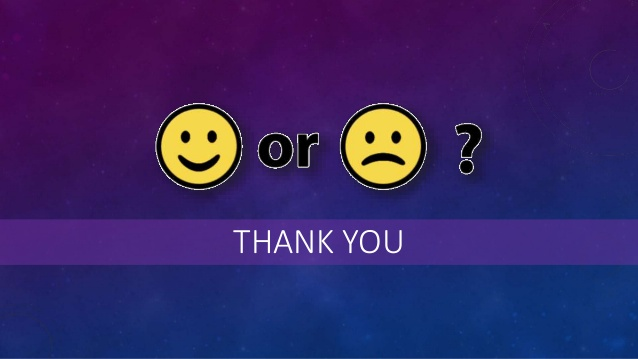